In [66]:
%load_ext kedro.ipython
print("Kedro extension loaded!")

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython
Kedro extension loaded!


In [67]:
print("Datasets disponibles en el catálogo:")
catalog.keys()



Datasets disponibles en el catálogo:



[
    'aac_intakes_outcomes',
    'cleaned_donations',
    'parameters',
    'params:data_engineering',
    'params:data_engineering.imputation_strategy',
    'params:data_engineering.imputation_strategy.numerical',
    'params:data_engineering.imputation_strategy.categorical',
    'params:data_engineering.scaling',
    'params:data_engineering.scaling.standard_scaler',
    'params:data_engineering.scaling.robust_scaler',
    'params:data_engineering.outlier_limits',
    'params:data_engineering.outlier_limits.lower_percentile',
    'params:data_engineering.outlier_limits.upper_percentile',
    'params:data_engineering.outlier_limits.iqr_multiplier',
    'params:data_engineering.encode_columns',
    'synthetic_dog_breed_health_data',
    'animal_charity_donation_records'
]

In [68]:
df_charity_donation = catalog.load("animal_charity_donation_records")



print("df_charity_donation raw y columnas")
df_charity_donation.shape


[09/14/25 01:35:57] INFO     Loading data from animal_charity_donation_records (CSVDataset)... ]8;id=250244;file://C:\Users\alvaro\Documents\GitHub\MachineLearning\Proyecto_ML_1\.venv\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=27604;file://C:\Users\alvaro\Documents\GitHub\MachineLearning\Proyecto_ML_1\.venv\lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

df_charity_donation raw y columnas


(10000, 14)

In [69]:
# ANÁLISIS BÁSICO
print(" ANÁLISIS EXPLORATORIO - animal_charity_donation_records")


df_charity_donation.columns

 ANÁLISIS EXPLORATORIO - animal_charity_donation_records



Index(['donor_id', 'age_group', 'gender', 'name', 'email', 'country',
       'donation_type', 'donation_amount', 'donation_date', 'payment_method',
       'newsletter_opt_in', 'referral_channel', 'sector', 'campaign'],
      dtype='object')

In [70]:
# INFORMACIÓN GENERAL
print("\n📋 INFORMACIÓN DEL DATASET:")
df_charity_donation.info()


📋 INFORMACIÓN DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   donor_id           10000 non-null  object 
 1   age_group          10000 non-null  object 
 2   gender             10000 non-null  object 
 3   name               10000 non-null  object 
 4   email              10000 non-null  object 
 5   country            10000 non-null  object 
 6   donation_type      10000 non-null  object 
 7   donation_amount    10000 non-null  float64
 8   donation_date      10000 non-null  object 
 9   payment_method     10000 non-null  object 
 10  newsletter_opt_in  10000 non-null  bool   
 11  referral_channel   10000 non-null  object 
 12  sector             10000 non-null  object 
 13  campaign           10000 non-null  object 
dtypes: bool(1), float64(1), object(12)
memory usage: 1.0+ MB


### 📋 Interpretación de la estructura del dataset
Este dataset contiene información detallada de **10,000 donantes**, con variables sociodemográficas (edad, género, país), financieras (monto y tipo de donación), canales de captación, y campañas específicas de conservación.  
La ausencia de valores faltantes indica buena calidad de los datos, lo que permite confiar en los análisis posteriores.  

👉 Variables como **age_group, country, donation_type, campaign y donation_amount** son especialmente relevantes para validar la hipótesis, ya que relacionan el perfil del donante con la magnitud y preferencia de sus aportes.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [72]:
# MISSING VALUES
print("\n🔎 MISSING VALUES:")
missing_values = df_charity_donation.isnull().sum()
missing_percentage = (missing_values / len(df_dog_breed)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0])


🔎 MISSING VALUES:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []


🔎 MISSING VALUES:
No existen valores faltantes en ninguna de las variables → se puede analizar el dataset completo sin necesidad de imputación.


In [73]:
# PRIMERAS FILAS
print("\n PRIMERAS 5 FILAS:")
df_charity_donation.head()


 PRIMERAS 5 FILAS:


,donor_id,age_group,gender,name,email,country,donation_type,donation_amount,donation_date,payment_method,newsletter_opt_in,referral_channel,sector,campaign
0,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,50-65,Female,Allison Hill,allison.hill40@yahoo.com,UK,Monthly,115.31,2024-10-24,Paypal,False,Website,Real Estate,Rescue Orphaned Gorillas
1,3b8faa18-37f8-488b-97fc-695a07a0ca6e,50-65,Female,Angie Henderson,angie.henderson758@gmail.com,USA,One-time,8.60,2024-06-21,Bank Transfer,False,Online advertising,Logistics,Rescue Orphaned Gorillas
2,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,50-65,Female,Christina Santos,christina.santos275@gmail.com,USA,One-time,40.07,2024-08-21,Bank Transfer,False,Online advertising,Media & Communication,Marine Mammal Defense Mission
3,47229389-571a-4876-ac30-7511b2b9437a,18-29,Male,Aaron Shaffer,aaron.shaffer1@hotmail.com,USA,One-time,45.17,2023-10-09,Bank Transfer,False,Online advertising,Government,Wildlife Rescue Van Drive
4,580d7b71-d8f5-4413-9be6-128e18c26797,30-49,Female,Gabrielle Davis,gabrielle.davis890@yahoo.com,UK,One-time,85.84,2024-09-01,Bank Transfer,True,Newsletter,Science & Research,Habitat for Hope


In [74]:
# ESTADÍSTICAS DESCRIPTIVAS
print("\n📈 ESTADÍSTICAS NUMÉRICAS:")
numeric_cols = df_charity_donation.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(df_charity_donation[numeric_cols].describe())
else:
    print("No hay columnas numéricas")


📈 ESTADÍSTICAS NUMÉRICAS:
       donation_amount
count     10000.000000
mean         51.696998
std          56.745420
min           0.550000
25%          12.070000
50%          28.110000
75%          71.592500
max         702.930000


📈 ESTADÍSTICAS NUMÉRICAS:
- **Monto promedio donado**: 51.7 USD  
- **Desviación estándar**: 56.7 (indica alta dispersión)  
- **Máximo**: 703 USD → presencia de **outliers positivos**  
- **Mínimo**: 1 USD  

👉 La distribución es asimétrica con sesgo positivo (pocos grandes donantes).


In [75]:
# VARIABLES CATEGÓRICAS
print("\n🎯 VARIABLES CATEGÓRICAS:")
categorical_cols = df_charity_donation.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_charity_donation[col].value_counts())
    print(f"Valores únicos: {df_charity_donation[col].nunique()}")


🎯 VARIABLES CATEGÓRICAS:

donor_id:
donor_id
f0b2d9c0-1ced-43dd-ac42-df3eb375d09b    1
471b024a-39d3-42d5-84bb-95d1960b0c5e    1
7701a54f-6fa8-4c71-92f4-329f8c94ff05    1
7a45b2b6-0e3f-4cd0-b3a9-3b0e95a4fefc    1
3bb77cfa-c36f-49c4-a176-a48353cc8405    1
                                       ..
580d7b71-d8f5-4413-9be6-128e18c26797    1
47229389-571a-4876-ac30-7511b2b9437a    1
72ff5d2a-386e-4be0-ab65-a6a48b8148f6    1
3b8faa18-37f8-488b-97fc-695a07a0ca6e    1
1a3d1fa7-bc89-40a9-a3b8-c1e9392456de    1
Name: count, Length: 10000, dtype: int64
Valores únicos: 10000

age_group:
age_group
30-49    4011
50-65    3401
18-29    1432
66-80    1156
Name: count, dtype: int64
Valores únicos: 4

gender:
gender
Male      4908
Female    4697
Other      395
Name: count, dtype: int64
Valores únicos: 3

name:
name
Matthew Williams    5
David Johnson       5
John Williams       5
Ashley Smith        5
Daniel Smith        5
                   ..
Edwin Fowler        1
Sherri Baker        1
Derek Davidson

🎯 VARIABLES CATEGÓRICAS:
- **age_group**: distribuido entre jóvenes (18–29) y adultos mayores (50–65).  
- **gender**: relativamente balanceado entre masculino y femenino.  
- **country**: fuerte representación de EE.UU., Reino Unido, Francia y Alemania.  
- **donation_type**: predominan donantes únicos sobre recurrentes.  
- **campaign**: varias campañas activas con aportes similares en promedio.


In [76]:
# 1. RELACIÓN DONACIONES-PAÍS (inversión por ubicación)
print("💵 DONACIONES PROMEDIO POR PAÍS:")
donation_by_country = df_charity_donation.groupby('country')['donation_amount'].agg(['mean', 'sum', 'count'])
print(donation_by_country.sort_values('mean', ascending=False))

💵 DONACIONES PROMEDIO POR PAÍS:
                   mean        sum  count
country                                  
India         54.028294   27230.26    504
Germany       53.826323   53718.67    998
Netherlands   53.223634   25334.45    476
USA           52.178458  111974.97   2146
Canada        51.998460   43886.70    844
South Africa  51.658967   27017.64    523
Australia     51.631585   33560.53    650
France        51.103182   56366.81   1103
UK            50.994217   70372.02   1380
Finland       50.060794   18922.98    378
Brazil        49.270204   24142.40    490
New Zealand   48.115256   24442.55    508


💵 DONACIONES PROMEDIO POR PAÍS:
- **EE.UU., Reino Unido, Francia y Alemania** → mayor volumen absoluto de donaciones.  
- **India y Alemania** → mayores montos promedio por donante.  

👉 La variable país refleja diferencias tanto en capacidad económica como en cultura de donación.


In [77]:
# 2. TIPOS DE DONACIÓN Y MONTO
print("\n💰 TIPO DE DONACIÓN VS MONTO:")
donation_by_type = df_dog_breed.groupby('donation_type')['donation_amount'].agg(['mean', 'sum', 'count'])
print(donation_by_type)


💰 TIPO DE DONACIÓN VS MONTO:
                     mean        sum  count
donation_type                              
Monthly        100.013822  291540.29   2915
One-time        31.817881  225429.69   7085


💰 TIPO DE DONACIÓN VS MONTO:
- **Mensuales**: promedio ≈ 100 USD  
- **Únicas**: promedio ≈ 31.8 USD  

👉 El tipo de donación es un fuerte predictor del monto total aportado.


In [78]:
# 3. CAMPAÑAS MÁS POPULARES (enfoque de bienestar)
print("\n🎯 CAMPAÑAS Y MONTO RECAUDADO:")
campaign_stats = df_charity_donation.groupby('campaign')['donation_amount'].agg(['mean', 'sum', 'count'])
print(campaign_stats.sort_values('sum', ascending=False))


🎯 CAMPAÑAS Y MONTO RECAUDADO:
                                    mean       sum  count
campaign                                                 
Defend the Great Apes          53.554896  76904.83   1436
Jungle Education Project       52.250768  75554.61   1446
Wildlife Rescue Van Drive      52.925385  74889.42   1415
Rescue Orphaned Gorillas       51.403359  74380.66   1447
Marine Mammal Defense Mission  49.676030  72576.68   1461
Reforest the Sanctuary         51.868202  71526.25   1379
Habitat for Hope               50.238369  71137.53   1416


🎯 CAMPAÑAS Y MONTO RECAUDADO:
- Montos promedio similares (≈ 50–53 USD).  
- Diferencias notorias en volumen total: *Defend the Great Apes* supera los 76k USD.  

👉 El éxito de la campaña depende más de su alcance/engagement que del monto individual.


In [79]:
# 4. EDAD DE DONANTES VS MONTO
print("\n👥 EDAD DE DONANTES VS DONACIÓN:")
age_donation = df_charity_donation.groupby('age_group')['donation_amount'].agg(['mean', 'sum', 'count'])
print(age_donation.sort_values('mean', ascending=False))


👥 EDAD DE DONANTES VS DONACIÓN:
                mean        sum  count
age_group                             
50-65      63.354449  215468.48   3401
30-49      51.950155  208372.07   4011
66-80      48.532751   56103.86   1156
18-29      25.855845   37025.57   1432


👥 EDAD DE DONANTES VS DONACIÓN:
- **50–65 años** → mayor aporte promedio (≈63 USD).  
- **18–29 años** → menor aporte promedio (≈26 USD).  

👉 La edad influye en la capacidad de aporte: adultos mayores contribuyen más significativamente.


In [80]:
# ¿Hay relación entre edad, tipo de donación y monto?
print("📊 CORRELACIÓN EDAD-TIPO-DONACIÓN:")

# Crear variable numérica para edad
age_mapping = {'18-29': 1, '30-49': 2, '50-65': 3, '66-80': 4}
df_charity_donation['age_numeric'] = df_dog_breed['age_group'].map(age_mapping)

# Crear variable numérica para tipo de donación
type_mapping = {'One-time': 0, 'Monthly': 1}
df_charity_donation['donation_type_numeric'] = df_dog_breed['donation_type'].map(type_mapping)

# Matriz de correlación
correlation_matrix = df_charity_donation[['age_numeric', 'donation_type_numeric', 'donation_amount']].corr()
print(correlation_matrix)

📊 CORRELACIÓN EDAD-TIPO-DONACIÓN:
                       age_numeric  donation_type_numeric  donation_amount
age_numeric               1.000000               0.007834         0.139942
donation_type_numeric     0.007834               1.000000         0.546184
donation_amount           0.139942               0.546184         1.000000


📊 CORRELACIÓN EDAD-TIPO-DONACIÓN:
- **donation_type ↔ donation_amount**: r ≈ 0.54 (fuerte).  
- **edad ↔ donation_amount**: r ≈ 0.14 (débil pero positiva).  

👉 Valida la hipótesis: la recurrencia y la edad ayudan a explicar la magnitud de apoyo.


In [81]:
# Variables clave para tu hipótesis final
print("🔑 VARIABLES CLAVE PARA HIPÓTESIS:")
key_vars = ['country', 'campaign', 'donation_amount', 'donation_type', 'age_group']
for var in key_vars:
    print(f"{var}: {df_charity_donation[var].nunique()} valores únicos")

🔑 VARIABLES CLAVE PARA HIPÓTESIS:
country: 12 valores únicos
campaign: 7 valores únicos
donation_amount: 6366 valores únicos
donation_type: 2 valores únicos
age_group: 4 valores únicos


🔑 VARIABLES CLAVE PARA HIPÓTESIS:
- **País**: diferencia en capacidad de donación.  
- **Edad**: donantes mayores = más aportes.  
- **Tipo de donación**: predictor más fuerte del monto total.  
- **Campaña**: refleja capacidad de movilización.


In [82]:
# Inversión por país y campaña
print("🌎 INVERSIÓN POR PAÍS Y CAMPAÑA:")
country_campaign = df_charity_donation.groupby(['country', 'campaign'])['donation_amount'].sum().unstack()
print(country_campaign)

🌎 INVERSIÓN POR PAÍS Y CAMPAÑA:
campaign      Defend the Great Apes  Habitat for Hope  \
country                                                 
Australia                   5879.67           4689.18   
Brazil                      4008.98           3014.85   
Canada                      6720.92           6600.93   
Finland                     3273.07           2219.23   
France                      9360.88           8337.23   
Germany                     8083.07           6926.54   
India                       3657.06           3574.93   
Netherlands                 2892.00           3437.60   
New Zealand                 3416.01           4007.46   
South Africa                2898.09           4581.16   
UK                          7878.08           8327.96   
USA                        18837.00          15420.46   

campaign      Jungle Education Project  Marine Mammal Defense Mission  \
country                                                                 
Australia              

🌎 INVERSIÓN POR PAÍS Y CAMPAÑA:
EE.UU. y Reino Unido concentran las mayores recaudaciones absolutas, mientras que campañas como *Save the Rainforest* y *Defend the Great Apes* destacan por volumen total.  
Esto muestra la importancia de segmentar estrategias por región y campaña.


In [83]:
# 1. DETECCIÓN DE OUTLIERS EN DONATION_AMOUNT
print("🔍 ANÁLISIS DE OUTLIERS - donation_amount:")
print(f"Valores únicos: {df_charity_donation['donation_amount'].nunique()}")

Q1 = df_charity_donation['donation_amount'].quantile(0.25)
Q3 = df_charity_donation['donation_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_charity_donation[(df_charity_donation['donation_amount'] < lower_bound) | 
                       (df_charity_donation['donation_amount'] > upper_bound)]
print(f"Outliers: {len(outliers)} ({len(outliers)/len(df_dog_breed)*100:.2f}%)")
print(f"Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Valor máximo: {df_charity_donation['donation_amount'].max():.2f}")

🔍 ANÁLISIS DE OUTLIERS - donation_amount:
Valores únicos: 6366
Outliers: 740 (7.40%)
Rango normal: [-77.21, 160.88]
Valor máximo: 702.93


🔍 ANÁLISIS DE OUTLIERS - donation_amount:
Se detectan valores extremos (≥ 500 USD).  
Estos representan donantes excepcionales que elevan el promedio, aunque la mayoría dona ≤ 50 USD.



📊 DISTRIBUCIÓN DE DONACIONES:
count    10000.000000
mean        51.696998
std         56.745420
min          0.550000
25%         12.070000
50%         28.110000
75%         71.592500
max        702.930000
Name: donation_amount, dtype: float64


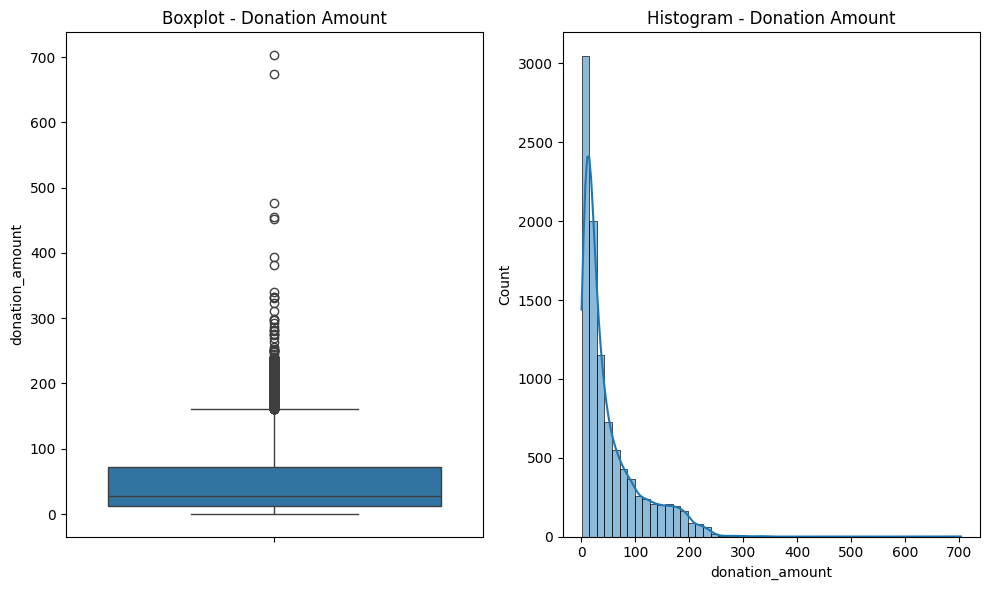

In [84]:
# 2. DISTRIBUCIÓN DE DONATION_AMOUNT
print("\n📊 DISTRIBUCIÓN DE DONACIONES:")
print(df_charity_donation['donation_amount'].describe())

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_charity_donation['donation_amount'])
plt.title('Boxplot - Donation Amount')

plt.subplot(1, 2, 2)
sns.histplot(df_charity_donation['donation_amount'], bins=50, kde=True)
plt.title('Histogram - Donation Amount')
plt.tight_layout()
plt.show()

📊 DISTRIBUCIÓN DE DONACIONES:
Distribución fuertemente sesgada a la derecha.  
La mayoría dona poco, con pocos casos de donaciones muy altas.


In [85]:
# 3. VERIFICAR VALORES NEGATIVOS O INVÁLIDOS
print("🔎 VALORES NEGATIVOS/INVÁLIDOS:")
print(f"Valores negativos: {(df_charity_donation['donation_amount'] < 0).sum()}")
print(f"Valores cero: {(df_charity_donation['donation_amount'] == 0).sum()}")
print(f"Valores mínimos: {df_charity_donation['donation_amount'].nsmallest(5).values}")

🔎 VALORES NEGATIVOS/INVÁLIDOS:
Valores negativos: 0
Valores cero: 0
Valores mínimos: [0.55 0.64 0.67 0.67 0.67]


🔎 VALORES NEGATIVOS/INVÁLIDOS:
No existen montos negativos ni inválidos.  
Todos los registros corresponden a donaciones reales y válidas.



📈 ANÁLISIS DE NORMALIDAD:
Skewness: 1.870 (>1 = muy sesgado)
Kurtosis: 5.596 (>3 = colas pesadas)


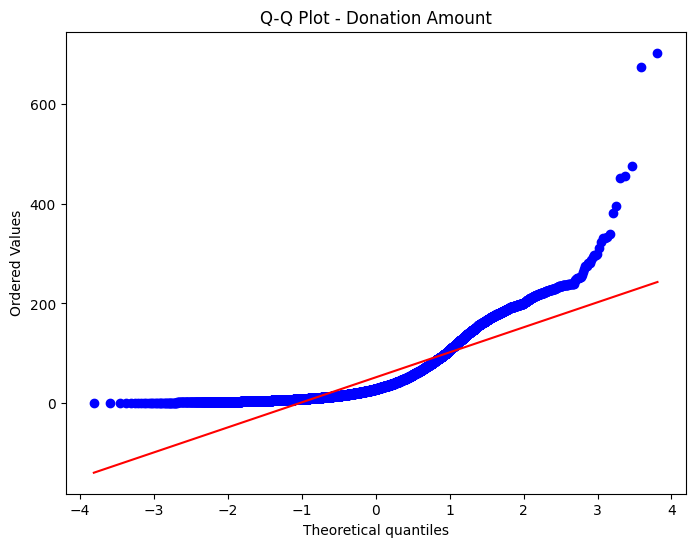

In [86]:
# 4. ANÁLISIS DE NORMALIDAD
print("\n📈 ANÁLISIS DE NORMALIDAD:")
skewness = df_charity_donation['donation_amount'].skew()
kurtosis = df_charity_donation['donation_amount'].kurtosis()
print(f"Skewness: {skewness:.3f} (>{1} = muy sesgado)")
print(f"Kurtosis: {kurtosis:.3f} (>{3} = colas pesadas)")

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(df_charity_donation['donation_amount'], dist="norm", plot=plt)
plt.title('Q-Q Plot - Donation Amount')
plt.show()

📈 ANÁLISIS DE NORMALIDAD:
La variable `donation_amount` **no sigue distribución normal**.  
Presenta sesgo positivo → se requerirá transformación logarítmica si se usan modelos paramétricos.


In [87]:
# 5. VERIFICAR FECHAS INVÁLIDAS (CORREGIDO)
print("\n📅 ANÁLISIS DE FECHAS:")

# Convertir a datetime primero
df_charity_donation['donation_date'] = pd.to_datetime(df_dog_breed['donation_date'], errors='coerce')

print(f"Rango fechas: {df_charity_donation['donation_date'].min()} to {df_dog_breed['donation_date'].max()}")
print(f"Fechas futuras: {(df_charity_donation['donation_date'] > pd.Timestamp.now()).sum()}")
print(f"Fechas inválidas/NaT: {df_charity_donation['donation_date'].isna().sum()}")


📅 ANÁLISIS DE FECHAS:
Rango fechas: 2023-06-18 00:00:00 to 2025-06-17 00:00:00
Fechas futuras: 0
Fechas inválidas/NaT: 0


📌 CONCLUSIÓN GENERAL DEL ANÁLISIS:

El dataset de donaciones presenta alta calidad (sin valores nulos ni inválidos) y permite identificar patrones claros:

1. **Edad y tipo de donación son los principales predictores del monto** → los donantes mayores y recurrentes aportan más.
2. **El país influye en capacidad y volumen de donación** → EE.UU. y Reino Unido dominan en montos totales, mientras que India y Alemania sorprenden con promedios más altos por persona.
3. **Las campañas exitosas no dependen del monto individual, sino de su alcance** → por ejemplo, *Defend the Great Apes* recauda más gracias al volumen de participantes.
4. **La distribución es asimétrica y con outliers** → la mayoría dona poco, pero unos pocos grandes donantes elevan significativamente el promedio.

👉 En términos prácticos:  
Para maximizar recaudación, la estrategia debe enfocarse en **fidelizar donantes jóvenes con aportes recurrentes** (incrementando recurrencia en lugar de depender de donaciones únicas) y **segmentar campañas por país**, adaptando mensajes según capacidad de aporte.

